##### Copyright 2018 The TensorFlow Authors.


In [1]:
import numpy as np
import pandas as pd
import keras
#from keras.models import Sequential,Input,Model
from keras.models import Sequential,Model
from keras.layers import Input##I added this because the next line was unable to succesfully import Input

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import ELU, PReLU, LeakyReLU
#from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import keras.backend as kb
import tensorflow as tf
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from PIL import ImageOps
import timeit
import matplotlib.pyplot as plt

ImportError: cannot import name 'experimental_functions_run_eagerly' from 'tensorflow.python.eager.def_function' (C:\Users\jacob\anaconda3\envs\sdse\lib\site-packages\tensorflow\python\eager\def_function.py)

# New Section

#We now import all processed images 

In [ ]:
rez = 650

imgall=np.zeros([124,rez,rez,1])
y=np.zeros([124,6])
dironly=np.zeros([124,2])
fulllabel=np.zeros([124,1])
a=0


# 3in Left 23 available
for i in range(1,24):
    imgall[a,:,:,:]=np.array(Image.open('Image Processing\\Direction\\3in\\Left\\L_3_Conv_{}.jpg'.format(str(i)))).reshape(rez,rez,1)
    y[a]=[1,0,0,0,0,0]
    dironly[a]=[1,0]
    fulllabel[a]=0
    a+=1
# 3in wide left 13 available
for i in range(1,14):
    imgall[a,:,:,:]=np.array(Image.open('Image Processing\\Direction\\3in_W\\Left\\L_3_W_Conv_{}.jpg'.format(str(i)))).reshape(rez,rez,1)
    y[a]=[0,1,0,0,0,0]
    dironly[a]=[1,0]
    fulllabel[a]=1
    a+=1
    
# 50in left 22 available
for i in range(1,23):
    imgall[a,:,:,:]=np.array(Image.open('Image Processing\\Direction\\50in\\Left\\L_50_W_Conv_{}.jpg'.format(str(i)))).reshape(rez,rez,1)
    y[a]=[0,0,1,0,0,0]
    dironly[a]=[1,0]
    fulllabel[a]=2
    a+=1
    
# 50in right 24 available
for i in range(1,25):
    imgall[a,:,:,:]=np.array(Image.open('Image Processing\\Direction\\50in\\Right\\R_50_Conv_{}.jpg'.format(str(i)))).reshape(rez,rez,1)
    y[a]=[0,0,0,1,0,0]
    dironly[a]=[0,1]
    fulllabel[a]=3
    a+=1
    
# 3in wide right (there are really 27, but I uploaded 25 to match the total of 124)
for i in range(1,26):
    imgall[a,:,:,:]=np.array(Image.open('Image Processing\\Direction\\3in_W\\Right\\R_3_W_Conv_{}.jpg'.format(str(i)))).reshape(rez,rez,1)
    y[a]=[0,0,0,0,1,0]
    dironly[a]=[0,1]
    fulllabel[a]=4
    a+=1
    
# 3in right 17 available
for i in range(1,18):
    imgall[a,:,:,:]=np.array(Image.open('Image Processing\\Direction\\3in\\Right\\R_3_Conv_{}.jpg'.format(str(i)))).reshape(rez,rez,1)
    y[a]=[0,0,0,0,0,1]
    dironly[a]=[0,1]
    fulllabel[a]=5
    a+=1
  #sharpleft=[1,0,0,0,0,0]
  #wideleft=[0,1,0,0,0,0]
  #sharp50left=[0,0,1,0,0,0]
  #sharp50right=[0,0,0,1,0,0]
  #wideright=[0,0,0,0,1,0]
  #sharpright=[0,0,0,0,0,1]

  #left=[1,0]
  #right=[0,1]
imgall=imgall.astype('float32')/255

In [ ]:
import random
randomlist = random.sample(range(0, 124), int(124*.2))
imgtest=imgall[randomlist,:,:]
ytest=y[randomlist,:]
dironlytest=dironly[randomlist,:]
fulllabeltest=fulllabel[randomlist,:]
main_list = list(set(range(0,124)) - set(randomlist))
imgtrain=imgall[main_list,:,:]
ytrain=y[main_list,:]
dironlytrain=dironly[main_list,:]
fulllabeltrain=fulllabel[main_list,:]

In [ ]:
batch_size = 8
epochs = 50
num_classes=6

In [93]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='linear',input_shape=(rez,rez,1),padding='same'))
model.add(LeakyReLU(alpha=.5))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=.5))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(25, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=.5))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=1))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 650, 650, 128)     1280      
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 650, 650, 128)     0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 325, 325, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 325, 325, 256)     295168    
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 325, 325, 256)     0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 163, 163, 256)    0         
 g2D)                                                

In [94]:
train = model.fit(imgtrain, ytrain, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(imgtest,ytest))

Epoch 1/50
13/13 [==============================] - 76s 6s/step - loss: 85.1339 - accuracy: 0.0800 - val_loss: 35.8384 - val_accuracy: 0.2083
Epoch 2/50
13/13 [==============================] - 76s 6s/step - loss: 20.8893 - accuracy: 0.1000 - val_loss: 13.2820 - val_accuracy: 0.1250
Epoch 3/50
13/13 [==============================] - 77s 6s/step - loss: 6.1442 - accuracy: 0.2500 - val_loss: 4.6589 - val_accuracy: 0.1667
Epoch 4/50
13/13 [==============================] - 78s 6s/step - loss: 2.2772 - accuracy: 0.4200 - val_loss: 2.7990 - val_accuracy: 0.1667
Epoch 5/50
13/13 [==============================] - 79s 6s/step - loss: 1.6823 - accuracy: 0.3700 - val_loss: 2.5137 - val_accuracy: 0.2917
Epoch 6/50
13/13 [==============================] - 74s 6s/step - loss: 1.5011 - accuracy: 0.5100 - val_loss: 3.6283 - val_accuracy: 0.1667
Epoch 7/50
13/13 [==============================] - 75s 6s/step - loss: 1.4288 - accuracy: 0.5800 - val_loss: 1.9290 - val_accuracy: 0.3333
Epoch 8/50
13/13

In [95]:
model.save('Complete_Direction_Car1')

INFO:tensorflow:Assets written to: Complete_Direction_Car1\assets


INFO:tensorflow:Assets written to: Complete_Direction_Car1\assets


In [86]:
#!zip -r Full_Direction_Car1.zip Complete_Direction_Car1

In [87]:
#from google.colab import files
#files.download("Full_Direction_Car1.zip")

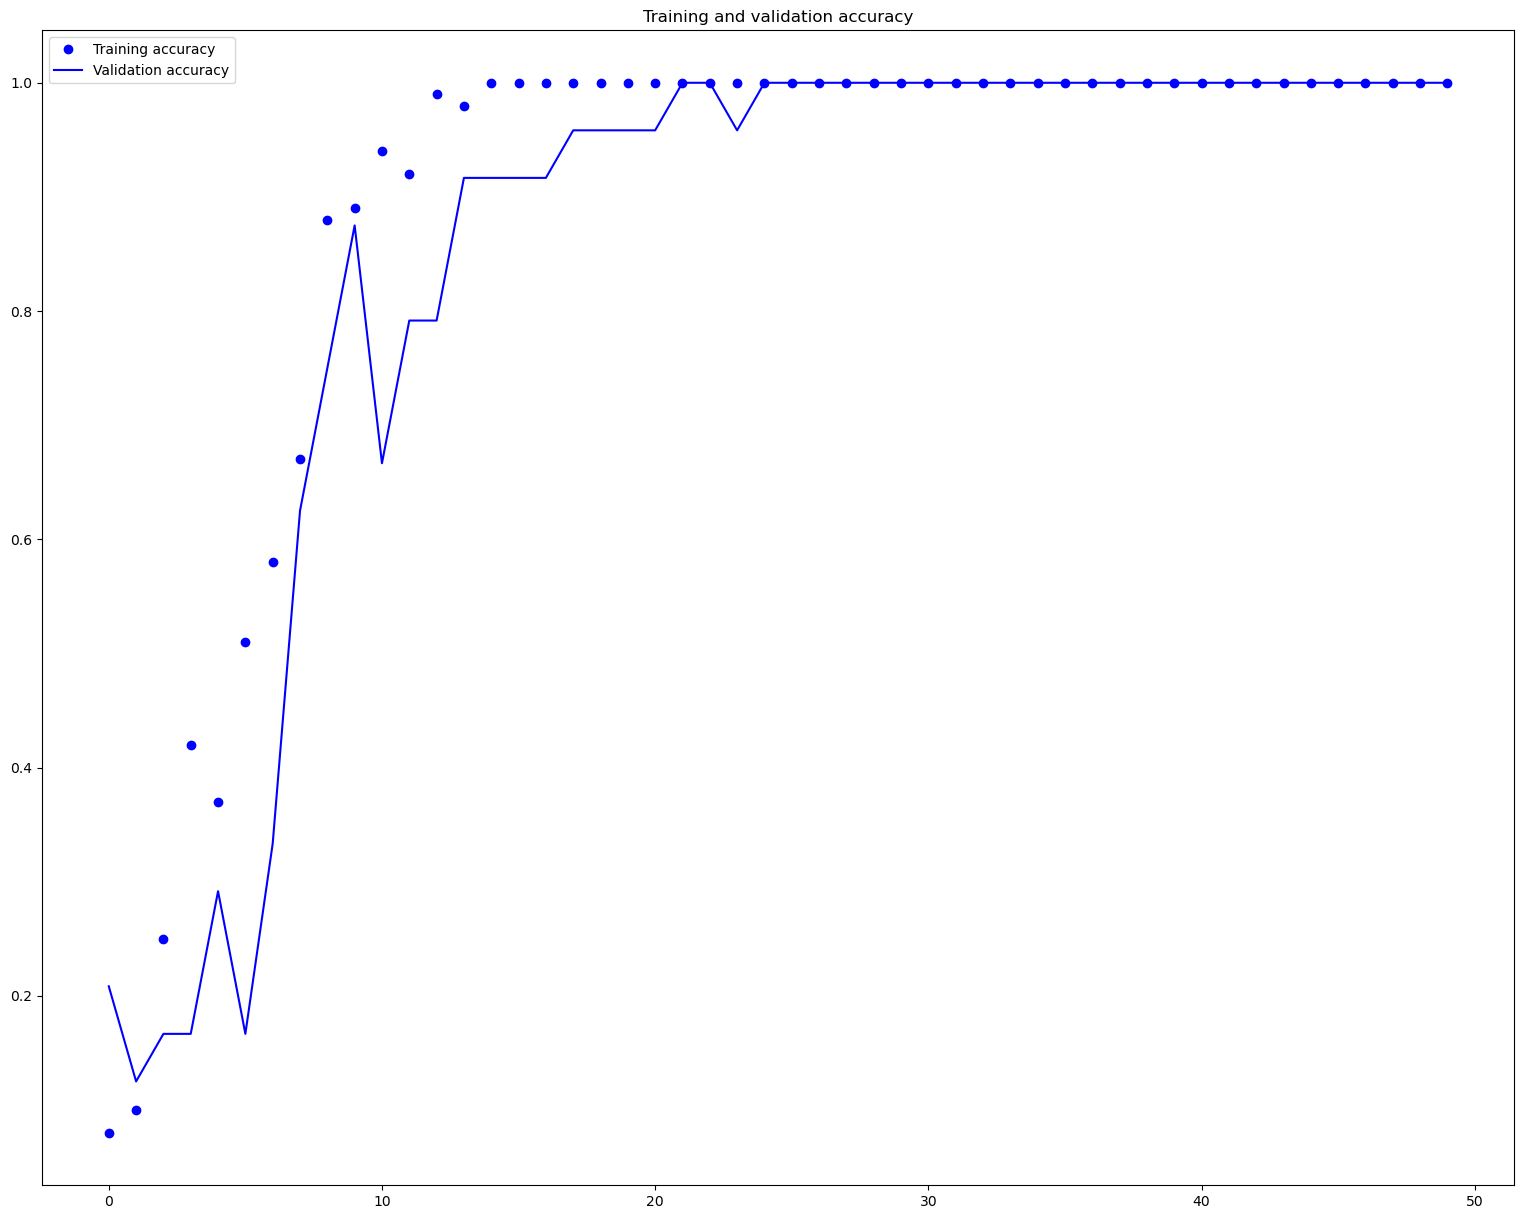

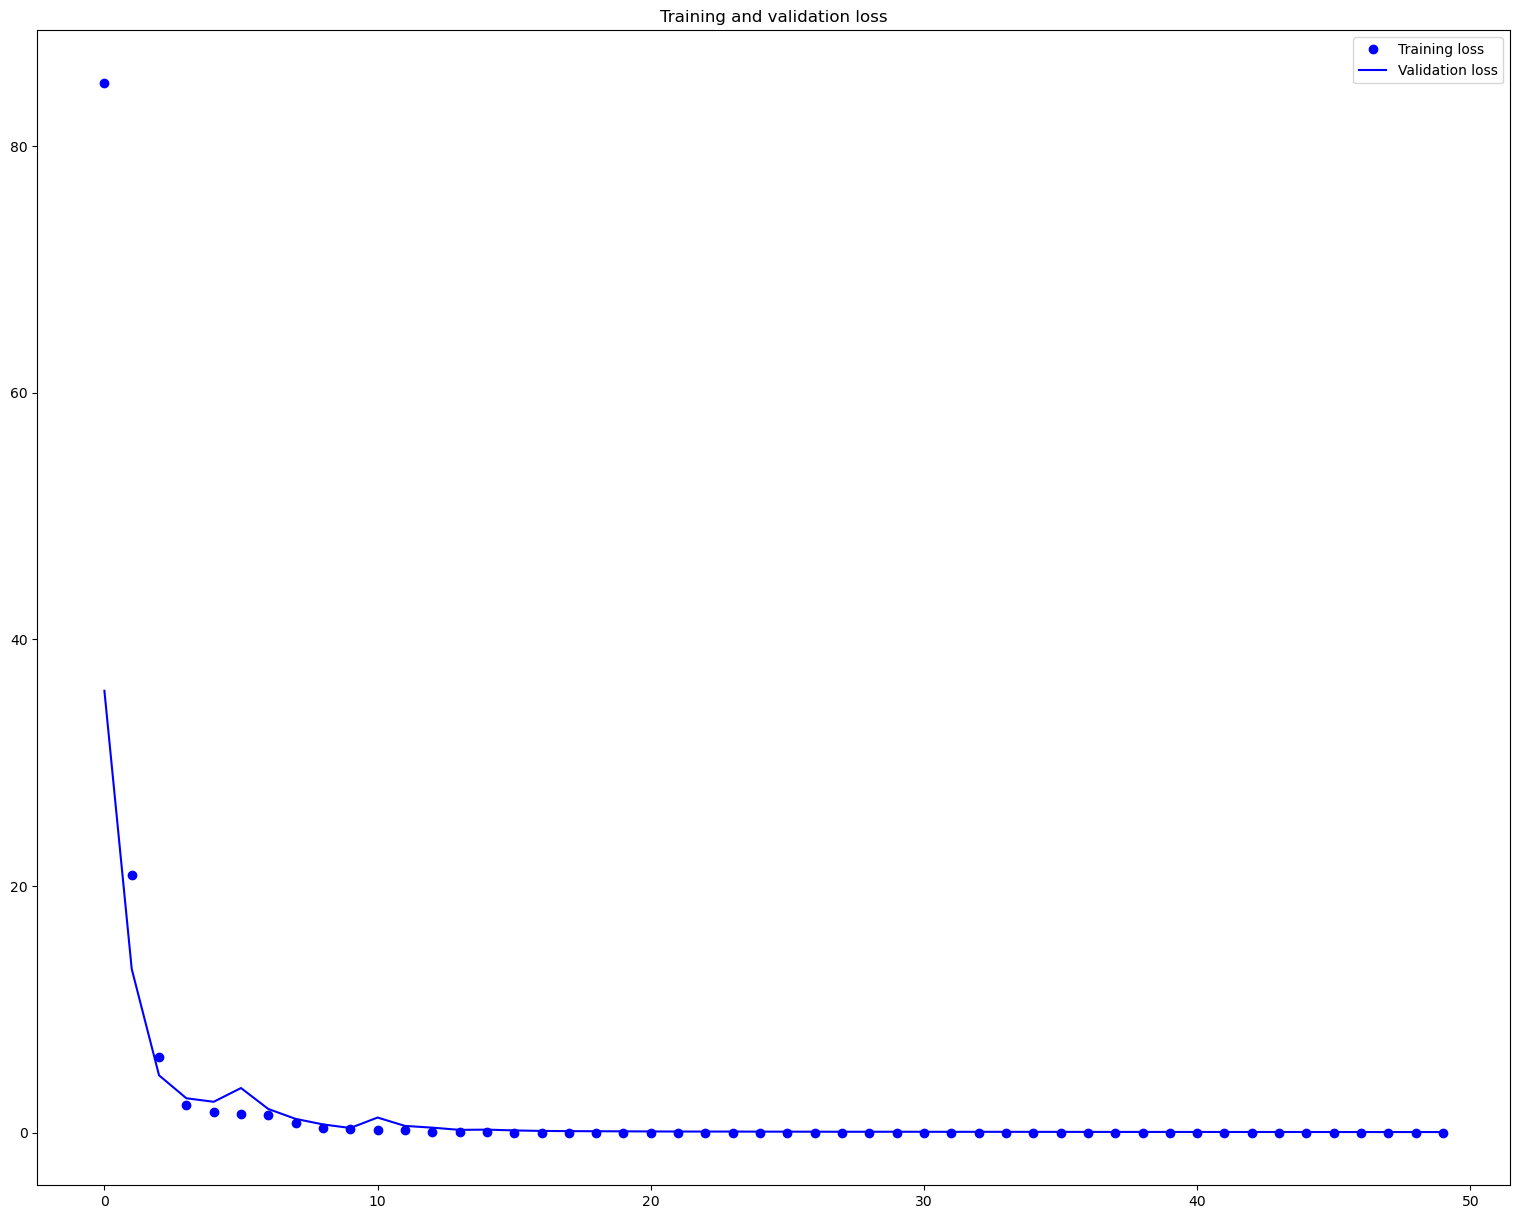

In [96]:
plt.rcParams["figure.figsize"] = (19,15)
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [65]:
ypred1=model.predict(imgtrain[:int(imgtrain.shape[0]/2),:,:])
ypred2=model.predict(imgtrain[int(imgtrain.shape[0]/2):,:,:])

2/2 [==============================] - 9s 3s/step


In [66]:
ypredtot=np.vstack([ypred1,ypred2])
ypredtot=np.argmax(ypredtot,axis=1).reshape(ypredtot.shape[0],1)
np.hstack([ypredtot,fulllabeltrain])

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [2., 2.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.

In [67]:
ypred=model.predict(imgtest)
ypred=np.argmax(ypred,axis=1).reshape(ypred.shape[0],1)
np.hstack([ypred,fulllabeltest])

1/1 [==============================] - 4s 4s/step


array([[0., 0.],
       [2., 2.],
       [4., 4.],
       [2., 2.],
       [4., 4.],
       [0., 4.],
       [0., 0.],
       [0., 0.],
       [4., 4.],
       [5., 5.],
       [5., 5.],
       [3., 3.],
       [4., 4.],
       [3., 3.],
       [0., 0.],
       [4., 4.],
       [4., 4.],
       [5., 5.],
       [3., 3.],
       [4., 4.],
       [0., 0.],
       [0., 0.],
       [3., 3.],
       [5., 5.]])

In [68]:
model_drop = Sequential()
model_drop.add(Conv2D(128, kernel_size=(3, 3),activation='linear',input_shape=(rez,rez,1),padding='same'))
model_drop.add(LeakyReLU(alpha=0.1))
model_drop.add(MaxPooling2D((2, 2),padding='same'))
model_drop.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
model_drop.add(LeakyReLU(alpha=0.1))
model_drop.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_drop.add(Conv2D(25, (3, 3), activation='linear',padding='same'))
model_drop.add(LeakyReLU(alpha=0.1))                  
model_drop.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_drop.add(Flatten())
model_drop.add(Dense(128, activation='linear'))
model_drop.add(LeakyReLU(alpha=0.1))
model_drop.add(Dropout(0.25))
model_drop.add(Dense(1))
model_drop.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 650, 650, 128)     1280      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 650, 650, 128)     0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 325, 325, 128)    0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 325, 325, 256)     295168    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 325, 325, 256)     0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 163, 163, 256)    0         
 2D)                                                  

In [69]:
train_drop = model_drop.fit(imgtrain, ytrain, batch_size=batch_size,epochs=epochs,verbose=1)

TypeError: unsupported operand type(s) for -: 'range' and 'int'

In [59]:
ypred1=model_drop.predict(imgtrain[:int(imgtrain.shape[0]/2),:,:])*ymed
ypred2=model_drop.predict(imgtrain[int(imgtrain.shape[0]/2):,:,:])*ymed
ypredtot=np.vstack([ypred1,ypred2])
np.hstack([ypredtot,ytrain*ymed])

2/2 [==============================] - 8s 3s/step


NameError: name 'ymed' is not defined

In [ ]:
np.sum(np.abs((ypredtot-ytrain*ymed)/ypredtot.shape[0]))

1.680331563127452

In [ ]:
ypred=model_drop.predict(imgtest)*ymed
np.hstack([ypred,ytest*ymed])

array([[ 7.52896214,  6.        ],
       [38.42802048, 45.        ],
       [11.2310648 , 15.        ],
       [47.10966492, 45.        ],
       [16.96430969, 20.        ],
       [18.27632332, 20.        ],
       [40.70408249, 40.        ],
       [36.79770279, 35.        ],
       [ 9.71201992, 15.        ],
       [53.30102539, 50.        ],
       [43.64939499, 45.        ],
       [30.93335915, 30.        ],
       [11.91085625, 15.        ],
       [14.01677704,  6.        ]])

In [ ]:
np.sum(np.abs((ypred-ytest*ymed)/ypred.shape[0]))

3.0871131760733466